#**Introduction**

**Author:** talfig

**Version:** 2023

**The project topic:** Differentiating between images of the planet Mars and the Moon.

I chose to develop a predictive model to differentiate between images of Mars and the Moon due to my deep interest in space exploration and celestial bodies. The ability to determine the origin of extraterrestrial landscapes through image analysis captivates my curiosity and pushes the boundaries of our understanding of the universe.

#**Features and Graphs**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tabulate import tabulate

As you can see, Mars is characterized by high values of red but low values of green and blue, resulting in an orange color. On the other hand, the Moon is characterized by high values of red, green, and blue, resulting in a white color.

Additionally, we can observe that space is characterized by very low values of red, green, and blue, resulting in a black color.

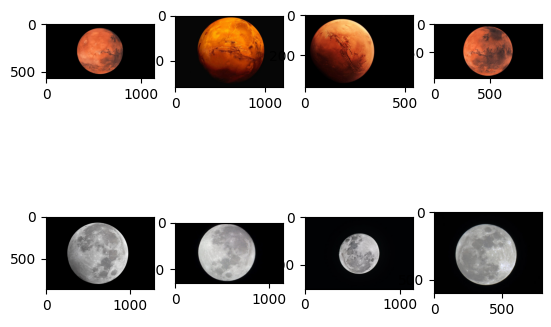

In [ ]:
for i in range(8):

  if i < 4:
    img = mpimg.imread('/content/drive/MyDrive/data/project/mars' + str(i + 1) + '.jpg')
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)

  else:
    img = mpimg.imread('/content/drive/MyDrive/data/project/moon' + str(i - 3) + '.jpg')
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)

plt.show()


Creating a function that returns a tuple of the average pixel values of the image it receives, represented in red, green, and blue (while ignoring the black background of space).

In [ ]:
# Define a function that takes an image as input and returns the average RGB values of non-black pixels in the image
def img_to_features(img):

  # Initialize counters for each color channel and for total non-black pixels
  red_counter = 0
  green_counter = 0
  blue_counter = 0
  counter = 0

  # Extract height, width, and number of color channels (i.e., RGB) from the image shape
  (hight, width, color) = img.shape

  # Iterate over each pixel in the image
  for i in range(hight):
    for x in range(width):

      # Check if the pixel is not black (i.e., at least one color channel has a value > 20)
      if (img[i, x, 2] > 20) or (img[i, x, 1] > 20) or (img[i, x, 0] > 20):

        # Increment the counter for total non-black pixels
        counter += 1

        # Increment the counter for each color channel for non-black pixels
        blue_counter += (img[i, x, 2])
        red_counter += (img[i, x, 0])
        green_counter += (img[i, x, 1])

  # Compute the average RGB values for non-black pixels
  return red_counter/counter, green_counter/counter, blue_counter/counter

This code creates arrays for the average pixel values, labels, and colors of 30 images, assigning values to them based on whether the image is classified as the Moon or Mars.

In [ ]:
# Create a 30x3 numpy array filled with zeros
featuresT = np.zeros((30,3))

colors = []
labelT = []

for i in range(30):

  # If i is less than 15, read the corresponding image and extract its features using a function called 'img_to_features'
  if i < 15:
    img = mpimg.imread('/content/drive/MyDrive/data/project/mars' + str(i + 1) + '.jpg')
    featuresT[i] = img_to_features(img)
    labelT.append("mars") # Add the label 'mars' to the label list
    colors.append("red") # Add the color 'red' to the color list

  # If i is greater than or equal to 15, read the corresponding image and extract its features using a function called 'img_to_features'
  else:
    img = mpimg.imread('/content/drive/MyDrive/data/project/moon' + str(i - 14) + '.jpg')
    featuresT[i] = img_to_features(img)
    labelT.append("moon")
    colors.append("blue")

In [ ]:
print(featuresT)
print(labelT)
print(colors)

[[195.56812497  95.50153576  60.40600642]
 [170.2187465   71.08459431   5.71368629]
 [152.69532276  72.84361169  37.49413911]
 [165.1666416   82.21805878  56.56229363]
 [127.90746896  71.35575341  45.51802942]
 [118.3744194   52.30750192  35.59809981]
 [147.48483494  72.83421599  52.88287041]
 [195.02896847 101.49469837  58.41883532]
 [162.23571543  90.3172935   49.80636721]
 [165.27393949  81.72493539  54.12267178]
 [198.6204778  108.06017942  65.82673926]
 [128.15780013  71.17941502  45.29511347]
 [113.62206602  49.01281691  30.18920694]
 [127.73189071  70.15305373  44.76635692]
 [164.33069872  56.63750099  34.89489367]
 [156.1282776  155.68045747 155.73855899]
 [178.60081823 177.49448593 177.37901373]
 [162.45904459 160.96872842 162.54576209]
 [157.33672959 157.64497944 156.26057618]
 [136.10745718 134.32160737 133.99611951]
 [153.45988155 152.14888294 152.563652  ]
 [172.72992285 170.5503467  169.71665103]
 [148.58313856 148.38881469 149.45860778]
 [195.73103909 195.43366823 194.96

This code creates arrays for the average pixel values, labels, and colors of 8 images for testing, assigning values to them based on whether the image is classified as the Moon or Mars.

In [ ]:
# Create a numpy array of shape (8, 3) filled with zeros
featuresTest = np.zeros((8,3))

labelTest = []
colorsTest = []

for i in range(8):

  # If i is less than 4, load an image of Mars, convert it to features using img_to_features() function and add to the featuresTest array at index i
  if i < 4:
    img = mpimg.imread('/content/drive/MyDrive/data/project/mars_test' + str(i + 1) + '.jpg')
    featuresTest[i] = img_to_features(img)

    labelTest.append("mars")
    colorsTest.append("green")

  # If i is greater than or equal to 4, load an image of Moon, convert it to features using img_to_features() function and add to the featuresTest array at index i
  else:
    img = mpimg.imread('/content/drive/MyDrive/data/project/moon_test' + str(i - 3) + '.jpg')
    featuresTest[i] = img_to_features(img)

    labelTest.append("moon")
    colorsTest.append("green")

In [ ]:
print(featuresTest)
print(labelTest)
print(colorsTest)

[[123.42423535  65.8646914   38.14161017]
 [146.94741903  85.64799258  54.18550523]
 [123.1104217   70.12385897  45.43350022]
 [160.59320289 101.25714441  70.14639867]
 [170.4413525  168.80259524 169.34146093]
 [136.63812727 137.63893428 139.63642138]
 [146.3285636  147.63474505 152.33636044]
 [154.88439342 159.39672655 159.26739898]]
['mars', 'mars', 'mars', 'mars', 'moon', 'moon', 'moon', 'moon']
['green', 'green', 'green', 'green', 'green', 'green', 'green', 'green']


This code assigns the average pixel values of the images to variables that receive the red, green, and blue color values.

In [ ]:
x = featuresT[:, 0] # Selecting the first column of featuresT and assigning it to x
y = featuresT[:, 1] # Selecting the second column of featuresT and assigning it to y
z = featuresT[:, 2] # Selecting the third column of featuresT and assigning it to z
r = featuresTest[:, 0] # Selecting the first column of featuresTest and assigning it to r
g = featuresTest[:, 1] # Selecting the second column of featuresTest and assigning it to g
b = featuresTest[:, 2] # Selecting the third column of featuresTest and assigning it to b

Displays 3 two-dimensional graphs of the average pixel values for 15 images of the Moon represented in blue and 15 images of Mars represented in red to choose the most suitable graph for classification and prediction by the algorithm.

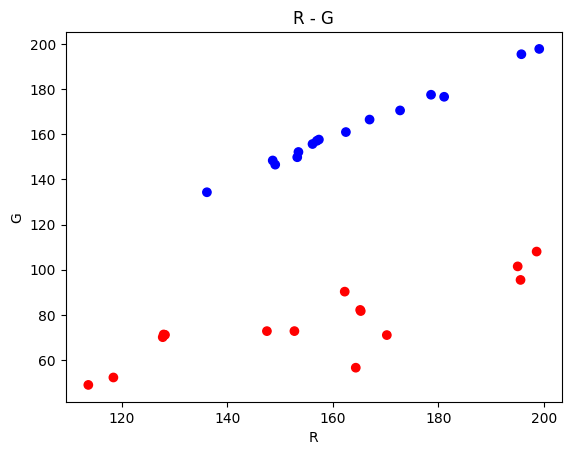

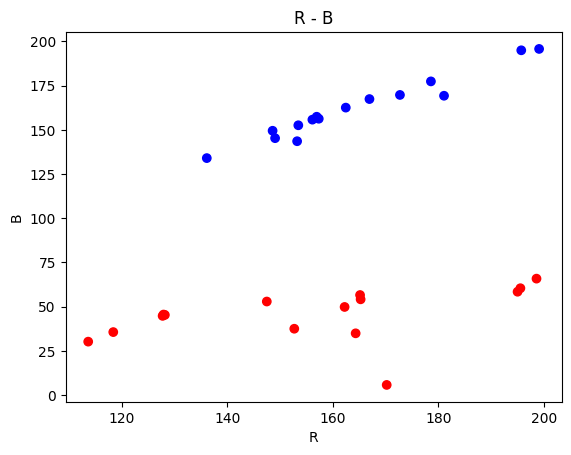

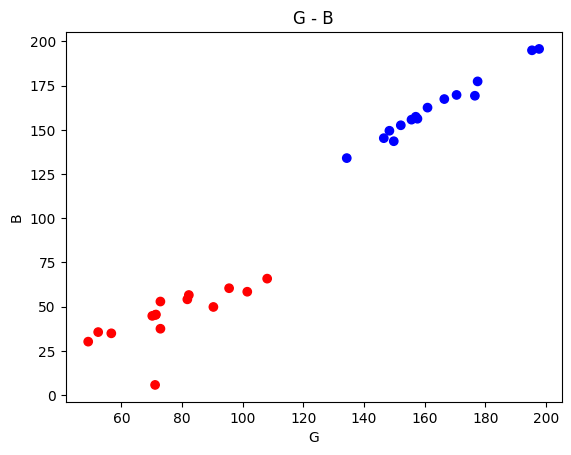

In [ ]:
# Scatter plot of x and y, with points colored according to the values in the colors variable
plt.scatter(x, y, color = colors)

# Set the label for the x-axis of the plot as "R"
plt.xlabel("R")

# Set the label for the y-axis of the plot as "G"
plt.ylabel("G")

plt.title("R - G")

plt.show()

# Scatter plot of x and z, with points colored according to the values in the colors variable
plt.scatter(x, z, color = colors)

# Set the label for the x-axis of the plot as "R"
plt.xlabel("R")

# Set the label for the y-axis of the plot as "B"
plt.ylabel("B")

plt.title("R - B")

plt.show()

# Scatter plot of y and z, with points colored according to the values in the colors variable
plt.scatter(y, z, color = colors)

# Set the label for the x-axis of the plot as "G"
plt.xlabel("G")

# Set the label for the y-axis of the plot as "B"
plt.ylabel("B")

plt.title("G - B")

plt.show()

I chose Graph Number 3 (G - B) because it displays the points more prominently than the other graphs. Additionally, the graph's layout shows all the average pixel values for Mars in one corner and those for the Moon in another corner, which allows for easy differentiation between the two. It is also worth noting that there are significant differences in the average pixel values between the Moon and Mars, which further enhances the distinguishing features of the graph.

Additionally, it displays the average pixel values of 8 test images in green.

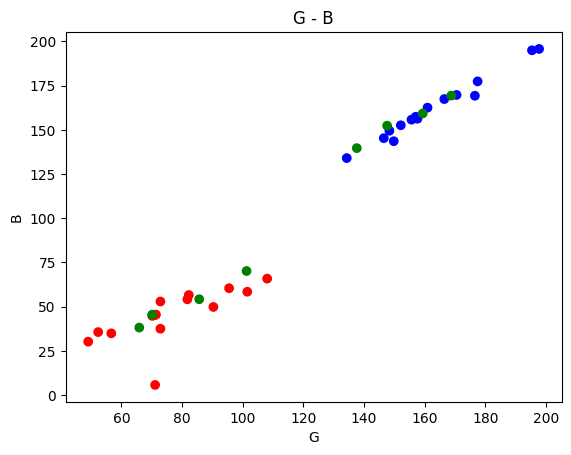

In [ ]:
# creates a scatter plot of y and z with colors specified by the 'colors' variable.
plt.scatter(y, z, color = colors)

# creates a scatter plot of g and b with colors specified by the 'colorsTest' variable.
plt.scatter(g, b, color = colorsTest)

# sets the label of the x-axis to "G".
plt.xlabel("G")

# sets the label of the y-axis to "B".
plt.ylabel("B")

plt.title("G - B")

plt.show()

#**KNN**

Creating a function that calculates the distance between two images. The function takes the average pixel values of the two images as input and returns the distance between them.

In [ ]:
def distance(x, y):
    # Calculate the difference between the second element of 'y' and the second element of 'x', then square the result
    Y = pow((y[1] - x[1]), 2)
    # Calculate the difference between the third element of 'y' and the third element of 'x', then square the result
    Z = pow((y[2] - x[2]), 2)
    # Add the squared values of 'Y' and 'Z', take the square root of the sum, and store the result in 'd'
    d = np.sqrt(Y + Z)
    return d

Creating a function that takes a point and a data array as input, calculates the distances between the given point and all other points in the data array, and returns a sorted list of distances along with their corresponding labels.

In [ ]:
# This function takes a feature vector x as input and calculates the distances between x and 30 other feature vectors.
def distance_checker(x):
  distance_values = [] # Create an empty list to store the distance values and corresponding labels.
  for i in range(30):
    temp = featuresT[i] # Get the i-th feature vector from the training set.
    # Calculate the distance between the input feature vector and the i-th feature vector and append the distance and label to the list.
    distance_values.append([distance(x, temp), labelT[i]])
  # Sort the list by distance in ascending order.
  distance_values.sort(key = lambda x: x[0])
  return distance_values

Creating the prediction function, which takes a list of distances and a value for the number of neighbors as input. It then selects the closest neighbors based on the given value and returns the most common label among them as the prediction.

In [ ]:
# This function takes in a list of distances and an integer k as input arguments
def knn_Classification(distance_list, k):
    neighbors = []
    # Iterate k times to get the k nearest neighbors from the distance list and append them to the neighbors list
    for i in range(k):
        # Append the neighbor index to the neighbors list
        neighbors.append(distance_list[i][1])
    # Find the most common neighbor in the neighbors list and assign it to the prediction variable
    prediction = max(neighbors, key=neighbors.count)
    return prediction

The code iterates over 8 test samples (4 from Mars and 4 from the Moon) and for each sample, it predicts the label using the algorithm with 3 neighbors and displays the corresponding test image along with the predicted label.

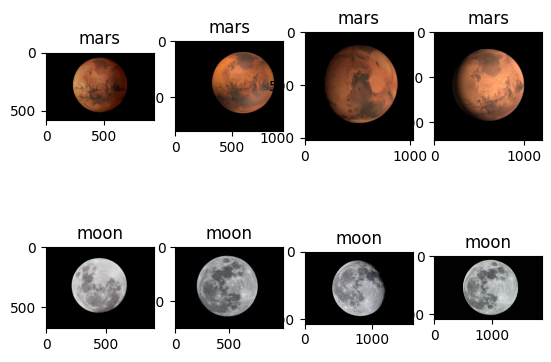

In [ ]:
for i in range(8):
    if i < 4:
        # Read the Mars image corresponding to the current value of i
        img = mpimg.imread('/content/drive/MyDrive/data/project/mars_test' + str(i + 1) + '.jpg')
    else:
        # Read the Moon image corresponding to the current value of i
        img = mpimg.imread('/content/drive/MyDrive/data/project/moon_test' + str(i - 3) + '.jpg')

    # Create a subplot with 2 rows, 4 columns, and the index of the current iteration
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)

    # Set the title of the subplot as the result of a k-nearest neighbors classification
    plt.title(knn_Classification(distance_checker(featuresTest[i]), 3))

plt.show()

##**KNN's Score**

The code performs classification for 8 test images using odd values for the number of neighbors from 3 to 7 (inclusive) and stores the predicted labels, corresponding test image numbers, and neighbor values in a list. The accuracy percentage of each classification is calculated and added to a score list. Finally, the score list is printed for different values of the number of neighbors.

In [ ]:
def Classification_score1(k):

    featuresPredict = []

    # Define the target names for classification report
    target_names = ['mars', 'moon']

    for i in range(8):

        # Call 'distance_checker' function on 'featuresTest[i]' and pass the result to 'knn_Classification' function with 'k' as a parameter
        # Append the predicted feature to 'featuresPredict' list
        featuresPredict.append(knn_Classification(distance_checker(featuresTest[i]), k))

    # Calculate the classification report by comparing 'labelTest' with 'featuresPredict' and specify the 'target_names'
    # The result is stored in the 'accuracy' variable
    accuracy = classification_report(labelTest, featuresPredict, target_names = target_names)

    print('K = ' + str(k), '\n' + accuracy)

    # Create a confusion matrix using 'labelTest' and 'featuresPredict' and display it using 'ConfusionMatrixDisplay' class
    # The colormap (color scheme) used for the plot is set to "Greens"
    ConfusionMatrixDisplay(confusion_matrix(labelTest, featuresPredict), display_labels = target_names).plot(cmap = "Greens")

    # Set the title of the plot to include the value of 'k'
    plt.title('K = ' + str(k))

    plt.show()

This code snippet includes a for loop that iterates over a range of numbers from 3 to 9 with a step size of 2. Inside the loop, the Classification_score1 function is called with the current value of k as a parameter. This code is intended to perform analysis using different values of

K = 3 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



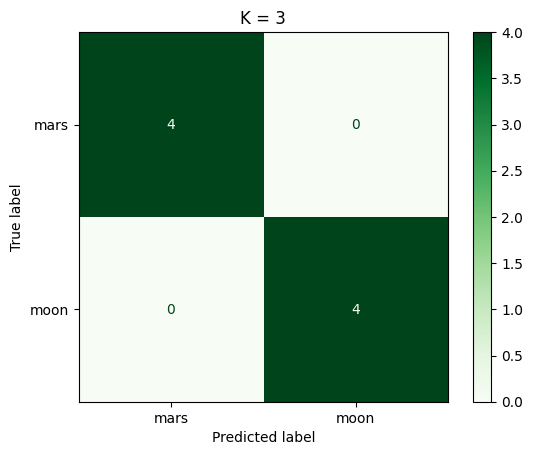

K = 5 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



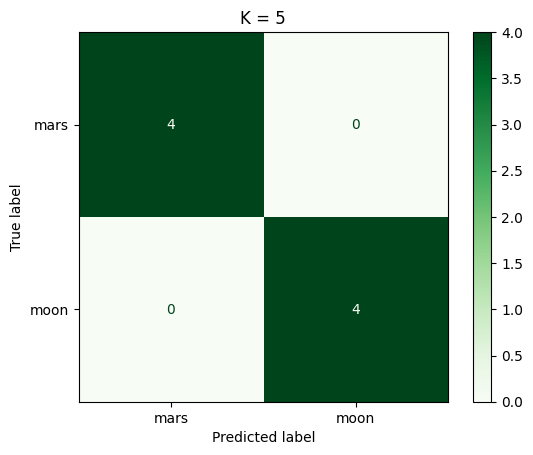

K = 7 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



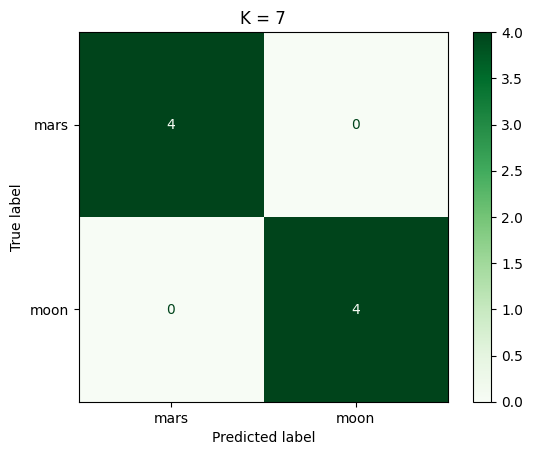

In [ ]:
# The for loop iterates over a range of numbers from 3 to 9 (exclusive) with a step size of 2.
for k in range(3, 9, 2):

    # Classification_score1(k) is a function call where the function takes 'k' as an argument.
    Classification_score1(k)

#**SVM**

The following code defines a function svc that creates an instance of the Support Vector Classifier (SVC) with a linear kernel and a C parameter defined by the parameter c. The function trains the classifier using the provided features and labels, and returns the trained SVM model.

In [ ]:
def svm_Classification(c):
  # Create an object of the SVC classifier
  svm = SVC(kernel = 'linear', C = c)
  # Training the svm model with the features and labels
  svm.fit(featuresT[:, 1:3], labelT)
  # Return the trained svm model
  return svm

Calls the prediction method of the new object on the parameter of the first test image. Then, it prints the prediction result.

In [ ]:
# Creating an SVM classifier object with the specified parameters
svm = svm_Classification(c = 1.0)

# Predict using the svm classifier on the first test object (featuresTest[0])
predict = svm.predict([featuresTest[0, 1:3]])

print(predict)

['mars']


The code iterates from 0 to 7 in a loop, performing image classification using a trained model. It reads different test images of Mars and the Moon based on the current loop index value and makes predictions using the model. Additionally, it prints the prediction for each image along with the corresponding index values. Finally, it displays the test images along with their index values.

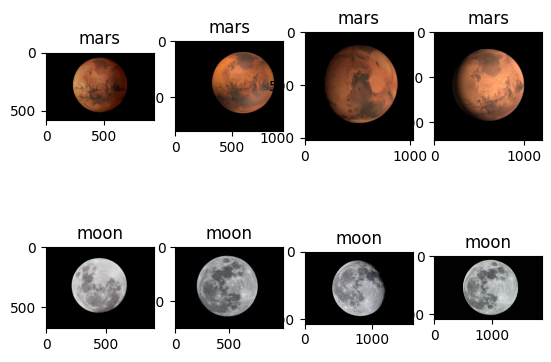

In [ ]:
for i in range(8):
    if i < 4:
        # Read the Mars image corresponding to the current value of i
        img = mpimg.imread('/content/drive/MyDrive/data/project/mars_test' + str(i + 1) + '.jpg')
    else:
        # Read the Moon image corresponding to the current value of i
        img = mpimg.imread('/content/drive/MyDrive/data/project/moon_test' + str(i - 3) + '.jpg')

    # Create a subplot with 2 rows, 4 columns, and the index of the current iteration
    plt.subplot(2, 4, i + 1)
    plt.imshow(img)

    # Set the title of the subplot to the predicted value from the SVM classifier
    plt.title(svm.predict([featuresTest[i, 1:3]])[0])

plt.show()

This code snippet uses the matplotlib library to create a scatter plot of points. It plots the values from the second and third columns of the featuresT array, with each point colored according to the colors variable. The code then retrieves the current x-axis and y-axis limits of the plot, creates a meshgrid of points (xx and yy) within the obtained limits, and finally displays the scatter plot with the points.

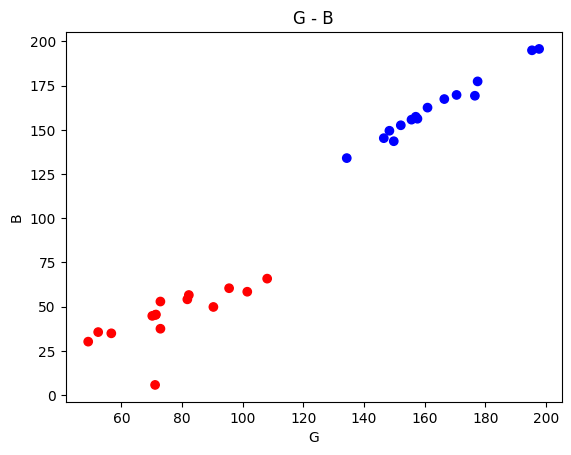

In [ ]:
# Scatter plot the values from the second and third columns of the 'featuresT' array
plt.scatter(featuresT[:, 1], featuresT[:, 2], color = colors)
# Get the current axes object
ax = plt.gca()

# Get the current x-axis limits
xlim = ax.get_xlim()

# Get the current y-axis limits
ylim = ax.get_ylim()

# Create an array 'xx' containing 30 evenly spaced values between the x-axis limits
xx = np.linspace(xlim[0], xlim[1], 30)

# Create an array 'yy' containing 30 evenly spaced values between the y-axis limits
yy = np.linspace(ylim[0], ylim[1], 30)

# This line sets the label of the x-axis to "G".
plt.xlabel("G")

# This line sets the label of the y-axis to "B".
plt.ylabel("B")

# This line sets the title of the plot to "G - B".
plt.title("G - B")

plt.show()

This code creates a function that takes a parameter c. The function initializes three 30x30 arrays with zeros. It then uses nested loops to iterate over every element in the arrays and assigns values based on given conditions. The decision function value is computed for each coordinate using XX and YY, and the result is stored in the corresponding element of the Dist array. The function then creates a scatter plot of points using XX and YY as coordinates, and Dist as marker sizes, displaying the data points with varying marker sizes based on the decision function values. Additionally, a decision boundary line is created using XX and YY for point distribution, with Dist as values, and specific line properties such as color, thickness, and styles. Finally, the scatter plot is displayed with the features and colors.

In [ ]:
def svm_graph(c):

  svm = svm_Classification(c)  # Creates an object of the 'svc' classifier with the parameter 'c' and assigns it to the variable 'svm'

  XX = np.zeros((30, 30))  # Initialize a 30x30 array of zeros and assign it to XX
  YY = np.zeros((30, 30))  # Initialize a 30x30 array of zeros and assign it to YY
  Dist = np.zeros((30, 30))  # Initialize a 30x30 array of zeros and assign it to Dist

  for row in range(30):  # Loop through the range from 0 to 29, assigning each value to row
      for col in range(30):  # Loop through the range from 0 to 29, assigning each value to col
          XX[row, col] = xx[col]  # Assign the value of xx[col] to the element at position [row, col] in XX
          YY[row, col] = yy[row]  # Assign the value of yy[row] to the element at position [row, col] in YY
          Dist[row, col] = svm.decision_function([[XX[row, col], YY[row, col]]])  # Calculate the decision function value for the given coordinates and assign it to the element at position [row, col] in Dist

  plt.scatter(XX, YY, -Dist, marker = '*')  # Scatter plot using XX and YY as coordinates and Dist as marker sizes
  plt.scatter(XX, YY, Dist, marker = '*')  # Scatter plot using XX and YY as coordinates and -Dist as marker sizes

  plt.contour(XX, YY, Dist, levels = [-1, 0, 1], colors = 'k', alpha = 0.5, linestyles = ['--', '-', '--'])  # Create a contour plot using XX and YY as coordinate grids, Dist as values, and specified contour levels, colors, alpha (transparency), and linestyles

  plt.scatter(featuresT[:, 1], featuresT[:, 2], color = colors)  # Scatter plot using the second column of featuresT as x-coordinates, the third column as y-coordinates, and specified colors

  # This line creates a scatter plot of g and b with colors specified by the 'colorsTest' variable.
  plt.scatter(g, b, color = colorsTest)

  # This line sets the label of the x-axis to "G".
  plt.xlabel("G")

  # This line sets the label of the y-axis to "B".
  plt.ylabel("B")

  # This line sets the title of the plot to "G - B (C = c)".
  plt.title("B - G (C = " + str(c) + ')')

  plt.show()

The following code snippet performs SVM (Support Vector Machine) classification three times. Each iteration corresponds to a different value of the C parameter defined by the c parameter. The loop iterates over the values 1, 0.1, and 0.01, passing them as c to the SVM classification function.

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


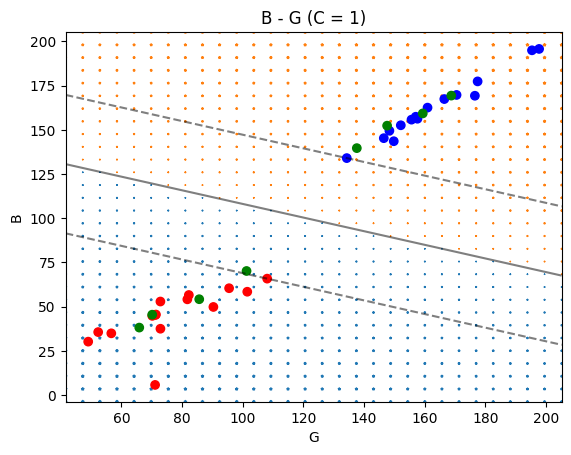

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


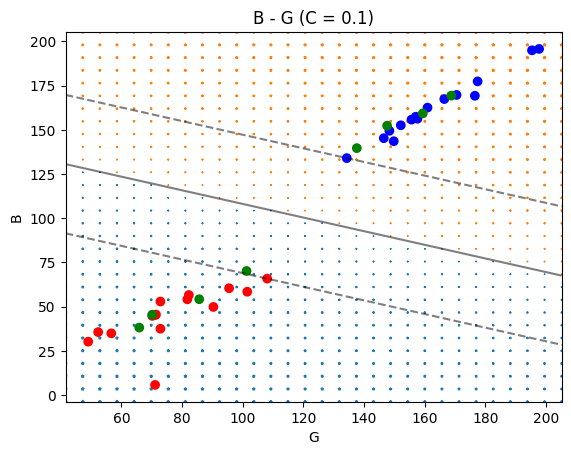

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


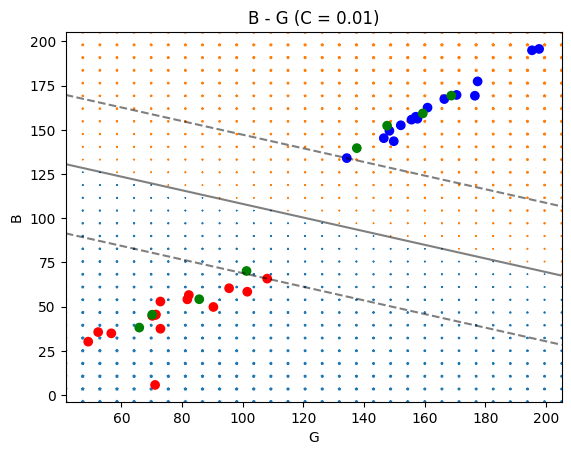

In [ ]:
for i in range(3):
  svm_graph(c = 10**-i)  # Call the svm_graph function with the argument 'c'

##**SVM's Score**

The following code defines a function named Classification_score2 that takes the parameter c as input. It trains the model (SVC) with a linear kernel and the regularization parameter c using the training features and labels. It then predicts labels for a subset of test features, calculates the classification report, displays the confusion matrix, and plots it. Finally, the function prints the parameter c and the classification report, along with showing the confusion matrix.

In [ ]:
def Classification_score2(c):

    svm = svm_Classification(c)  # Creates an object of the 'svc' classifier with the parameter 'c' and assigns it to the variable 'svm'

    featuresPredict = []
    target_names = ['mars', 'moon']

    for i in range(8):

        # Predict the label for the current test feature using the SVM model and append it to the "featuresPredict" list
        featuresPredict.append(svm.predict([featuresTest[i, 1:3]]))

    # Calculate the classification report, which includes precision, recall, F1-score, and support, based on the actual labels "labelTest" and the predicted labels "featuresPredict"
    accuracy = classification_report(labelTest, featuresPredict, target_names = target_names)

    print('C = ' + str(c), '\n' + accuracy)

    # Calculate the confusion matrix based on the actual labels "labelTest" and the predicted labels "featuresPredict", and plot it using a green colormap
    ConfusionMatrixDisplay(confusion_matrix(labelTest, featuresPredict), display_labels = target_names).plot(cmap = "Greens")

    # Set the title of the plot to indicate the regularization parameter "c"
    plt.title('C = ' + str(c))

    plt.show()

C = 1 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



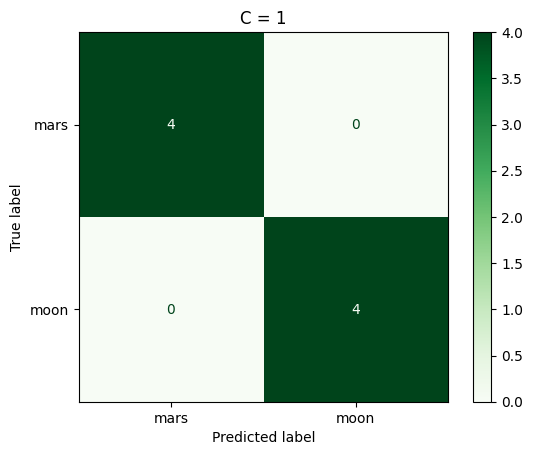

C = 0.1 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



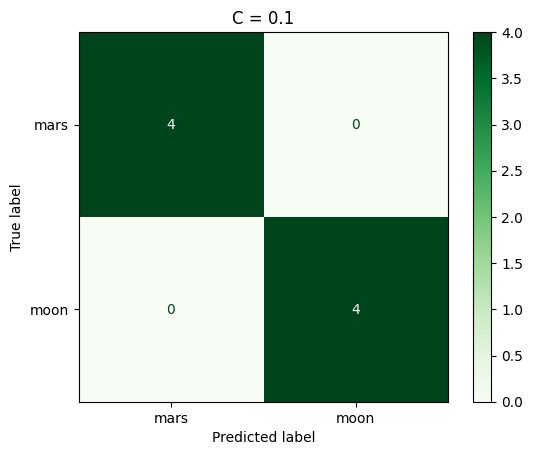

C = 0.01 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



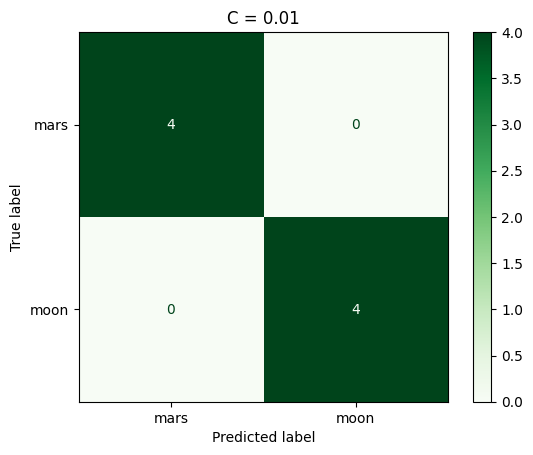

In [ ]:
for i in range(3):

  # Calling Classification_score2 function.
  Classification_score2(10**-i)

#**Perceptron**

Creates a function that takes three parameters. The function uses these parameters to compute and predict the classification of the image. Finally, the function returns the image classification.

In [ ]:
# Creating a function that gets three inputs to predict the class label using a perceptron model
def perceptron_predict(w, b, x):
    out = 0

    for i in range(len(w)):
        out += w[i] * x[i]  # Compute the weighted sum of inputs and weights

    out += b  # Add the bias term

    if out > 0:  # If the output is positive
        return 'moon'  # Classify as 'moon'
    else:
        return 'mars'  # Classify as 'mars'

This code defines a function that trains the model using the provided features and labels. It initializes the weight vector and bias, sets the learning rate and number of iterations, and then iterates over the images to update the weights and bias based on prediction errors. The training continues until all images are correctly classified or the maximum number of iterations is reached.

In [ ]:
# Creating a function that performs the training of a perceptron model using the provided features and labels.
def perceptron_fit(featuresT, labelT, learning_rate, num_epochs):

    # Get the number of examples and features
    n_examples, n_features = featuresT.shape

    # Initialize the weight vector and bias
    w = np.ones((n_features))
    bias = 0

    # initialize the error count
    n_errors = 0

    for epoch in range(num_epochs):

        # Reset the error count for each epoch
        n_errors = 0

        # Iterate over each example
        for i in range(n_examples):

            # Get the current example and its label
            x = featuresT[i]
            y = labelT[i]

            # Make a prediction using the perceptron_predict function
            predict = perceptron_predict(w, bias, x)

            # Check if the prediction is incorrect and update weights and bias accordingly
            if y == 'mars' and predict == 'moon':
                n_errors += 1
                for t in range(len(w)):
                    w[t] -= learning_rate * x[t]
                bias -= 1

            elif y == 'moon' and predict == 'mars':
                n_errors += 1
                for t in range(len(w)):
                    w[t] += learning_rate * x[t]
                bias += 1

        # Check if all examples are classified correctly and break the loop if so
        if n_errors == 0:
            break

    # Return the learned weights and bias
    return [w, bias]

This code fits a model to a feature and label array. It calls the function with the features and labels as parameters and assigns the returned values to variables representing the model's weight and bias.

In [ ]:
# Fit a perceptron model to the features and labels
w, bias = perceptron_fit(featuresT[:, 1:3], labelT, learning_rate = 10**-5, num_epochs = 10**5)
print('w = ' + str(w) + ', bias = ' + str(bias))

w = [0.86837118 0.92044188], bias = -155


This code snippet plots a scatter graph of points from the array of average pixel values of the images, where the graph represents the values from the third column as a function of the values from the second column. It also plots a line connecting the minimum value in the second column to the maximum value, with the corresponding value in the third column calculated using the weight vector and bias.

In [ ]:
def perceptron_graph(learning_rate, num_epochs):

  w, bias = perceptron_fit(featuresT[:, 1:3], labelT, learning_rate, num_epochs)

  x0 = featuresT[:, 1].min()  # Finding the minimum value along the second column of featuresT
  x1 = featuresT[:, 1].max()  # Finding the maximum value along the third column of featuresT

  y0 = -(x0 * w[0] + bias) / w[1]  # Calculating the y-coordinate for the line using the minimum x-value
  y1 = (x1 * w[0] + bias) / w[1]  # Calculating the y-coordinate for the line using the maximum x-value

  plt.plot([x0, x1], [y0, y1])  # Plotting a line segment connecting (x0, y0) and (x1, y1)

  plt.scatter(featuresT[:, 1], featuresT[:, 2], color = colors)  # Plotting the scatter plot of featuresT using specified colors
  plt.scatter(featuresTest[:, 1], featuresTest[:, 2], color = 'green')  # Plotting the scatter plot of featuresT using specified colors

  # This line sets the label of the x-axis to "G".
  plt.xlabel("G")

  # This line sets the label of the y-axis to "B".
  plt.ylabel("B")

  # This line sets the title of the plot to "G - B('learning-rate' = learning_rate).
  plt.title("G - B (learning-rate = " + str(learning_rate) + ')')

  plt.show()


This code snippet performs a loop that iterates from 0 to 5, inclusive. In each iteration, the function perceptron_graph is called with varying learning rates.

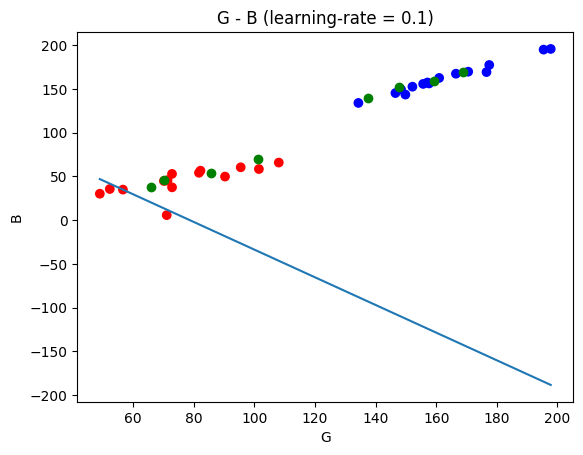

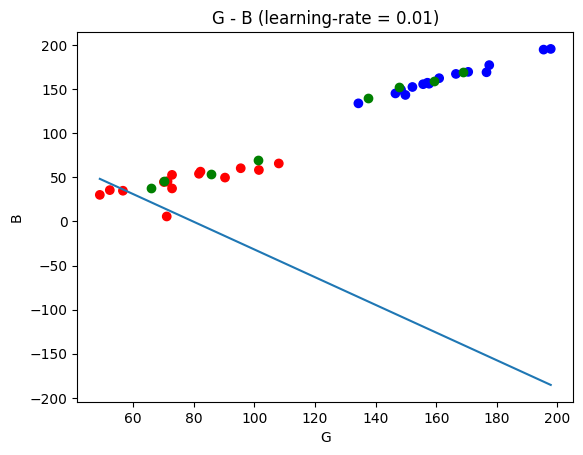

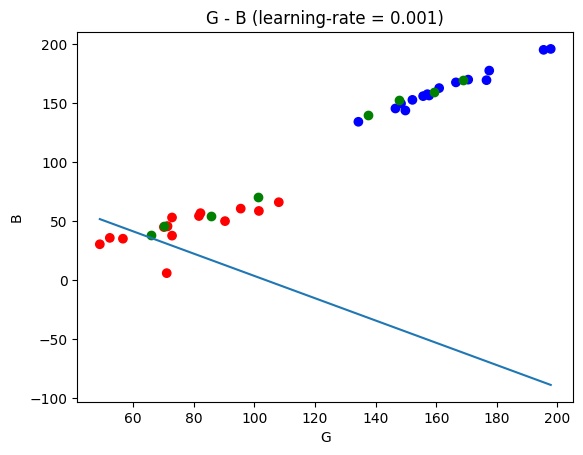

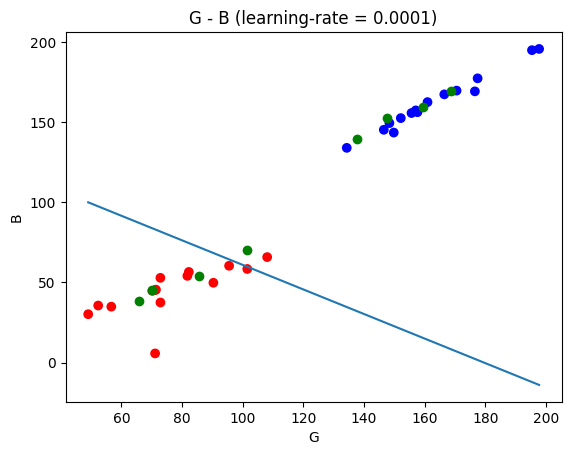

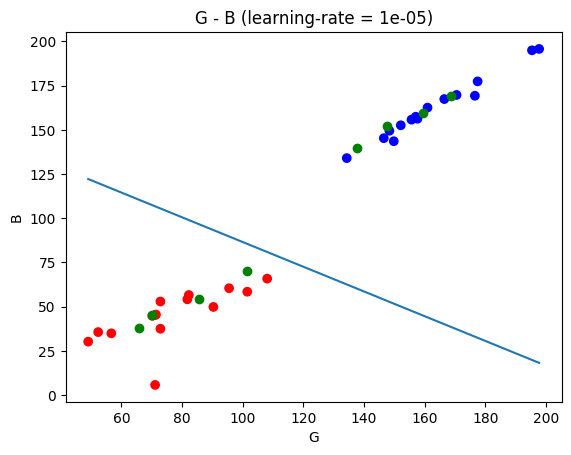

In [ ]:
for i in range(1, 6):
  # Calling the 'perceptron_graph' function
  perceptron_graph(learning_rate = 10**-i, num_epochs = 10**5)

This code defines a function that takes an image as a parameter. It then calculates the coordinates of the second and third elements of the image, as well as the predefined weights and bias. Finally, it compares the coordinate calculated by the model with the image parameter it receives and returns ['Moon'] or ['Mars'] based on the comparison result.

In [ ]:
# Define a function that performs perceptron classification on an image
def perceptron_classification(img, learning_rate, num_epochs):
    # Define an inner function f(x) that performs the perceptron fitting and calculates the y-coordinate of a line
    def f(x):
        w, bias = perceptron_fit(featuresT[:, 1:3], labelT, learning_rate, num_epochs) # Fit a perceptron model to the features and labels

        x0 = featuresT[:, 1].min()  # Finding the minimum value along the second column of featuresT
        x1 = featuresT[:, 1].max()  # Finding the maximum value along the third column of featuresT
        y0 = -(x0 * w[0] + bias) / w[1]  # Calculating the y-coordinate for the line using the minimum x-value
        y1 = (x1 * w[0] + bias) / w[1]  # Calculating the y-coordinate for the line using the maximum x-value

        m = (y1 - y0) / (x1 - x0)
        b = y0 - m * x0

        return m * x + b

    # Check if the third element of img is greater than the value returned by f(img[1])
    if img[2] > f(img[1]):
        # Return 'moon' if the condition is True
        return 'moon'
    else:
        # Return 'mars' if the condition is False
        return 'mars'

The code calls a function and passes the first feature from the test data array as a parameter to the function. The function implements the prediction algorithm, a classification model, which takes features as parameters and makes predictions based on learned weights and bias. By passing the first feature, the code evaluates the performance of the prediction algorithm on that specific feature.

In [ ]:
# Calling the perceptron_classification function and passing the first feature from the test dataset as input.
perceptron_classification(img = featuresTest[0], learning_rate = 10**-5, num_epochs = 10**5)

'mars'

This code snippet iterates over the range from 0 to 7 and creates sections for displaying images of Mars and the Moon. It uses the mpimg.imread() function to read the image files based on the value of i. The title of each section is set using the perceptron_classification() function with specific input parameters. Finally, the sections are displayed.

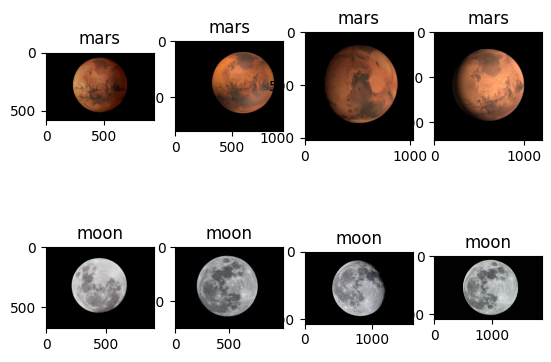

In [ ]:
for i in range(8):
    # If i is less than 4
    if i < 4:
        # Create the image file path for Mars image using * operator
        img = mpimg.imread('/content/drive/MyDrive/data/project/mars_test' + str(i + 1) + '.jpg')
    else:
        # Create the image file path for Moon image using * operator
        img = mpimg.imread('/content/drive/MyDrive/data/project/moon_test' + str(i - 3) + '.jpg')

    # Create a subplot with 2 rows, 4 columns, and i+1 index
    plt.subplot(2, 4, i + 1)

    # Display the image using imshow() function
    plt.imshow(img)

    # Set the title of the subplot using perceptron_classification() function
    plt.title(perceptron_classification(img = featuresTest[i], learning_rate = 10**-5, num_epochs = 10**5))

plt.show()

The code defines a table as a list of lists, where each inner list represents a row in the table. The table contains information about different learning rates and the corresponding number of iterations, weights, and bias obtained from running the perceptron_fit function with various parameters. It then uses the table function to print the table with formatted headers and frame layout.

In [ ]:
num_epochs = 10**5

# Create a table to store the results
table = [['learning-rate', 'number of epochs', '[w0, w1]', 'b']]

# Iterate through different learning rates
for i in range(1, 4):
    # Compute the weights and bias using the perceptron_fit function
    w = perceptron_fit(featuresT[:, 1:3], labelT, 10**-i, num_epochs)[0]
    bias = perceptron_fit(featuresT[:, 1:3], labelT, 10**-i, num_epochs)[1]

    # Add a new row to the table with the learning rate, number of epochs, weights, and bias
    table.append([str(10**-i), str(num_epochs), str(w), str(bias)])

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════════════╤════════════════════╤═════════════════════════════╤═════╕
│   learning-rate │   number of epochs │ [w0, w1]                    │   b │
╞═════════════════╪════════════════════╪═════════════════════════════╪═════╡
│           0.1   │             100000 │ [-28.38537694  29.8526324 ] │ -10 │
├─────────────────┼────────────────────┼─────────────────────────────┼─────┤
│           0.01  │             100000 │ [-3.12019299  3.3885071 ]   │ -11 │
├─────────────────┼────────────────────┼─────────────────────────────┼─────┤
│           0.001 │             100000 │ [-0.09008766  0.35739958]   │ -14 │
╘═════════════════╧════════════════════╧═════════════════════════════╧═════╛


##**Perceptron's Score**

This code defines a function named Classification_score3 that takes two parameters: learning_rate and num_epochs. Inside the function, it iterates over a range of 8 and calls another function named perceptron_classification to predict labels based on the provided features. It then calculates accuracy and other metrics using classification_report, creates a confusion matrix using confusion_matrix, and displays it.

In [ ]:
# defines a function named Classification_score3 that takes four parameters: learning_rate and num_epochs.
def Classification_score3(learning_rate, num_epochs):

  featuresPredict = []  # Initialize an empty list to store predicted labels
  target_names = ['mars', 'moon']  # Define the names of target classes

  for i in range(8):  # Iterate over the range of 0 to 7

    # Call the perceptron_classification function with the i-th element from featuresTest
    featuresPredict.append(perceptron_classification(featuresTest[i], learning_rate, num_epochs))

  # Calculate the accuracy and other metrics using classification_report
  accuracy = classification_report(labelTest, featuresPredict, target_names = target_names)


  print('learning_rate = ' + str(learning_rate), '\n' + accuracy)

  # Generate a confusion matrix using the confusion_matrix function
  # and plot it using the plot method with the cmap parameter set to "Greens"
  ConfusionMatrixDisplay(confusion_matrix(labelTest, featuresPredict), display_labels = target_names).plot(cmap = "Greens")

  # Set the title of the plot to include the learning_rate value
  plt.title('learning_rate = ' + str(learning_rate))

  plt.show()

learning_rate = 1 
              precision    recall  f1-score   support

        mars       0.00      0.00      0.00         4
        moon       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


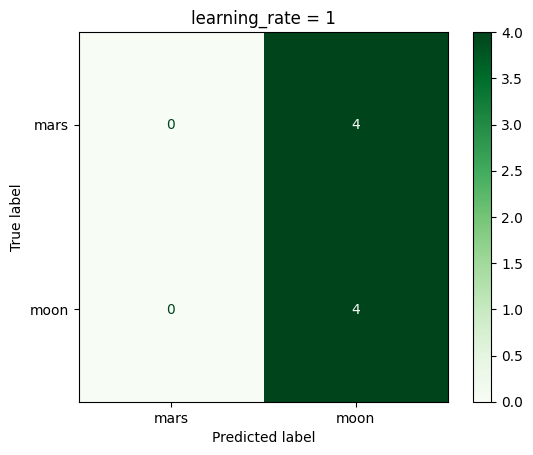

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


learning_rate = 0.1 
              precision    recall  f1-score   support

        mars       0.00      0.00      0.00         4
        moon       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



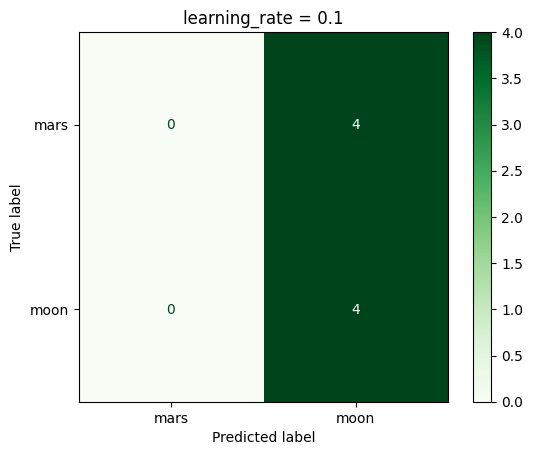

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


learning_rate = 0.01 
              precision    recall  f1-score   support

        mars       0.00      0.00      0.00         4
        moon       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



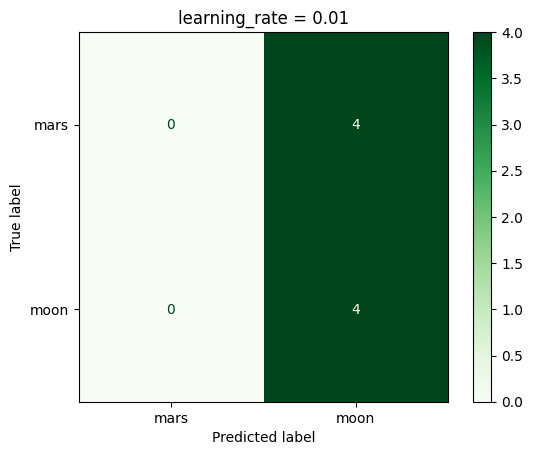

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


learning_rate = 0.001 
              precision    recall  f1-score   support

        mars       0.00      0.00      0.00         4
        moon       0.50      1.00      0.67         4

    accuracy                           0.50         8
   macro avg       0.25      0.50      0.33         8
weighted avg       0.25      0.50      0.33         8



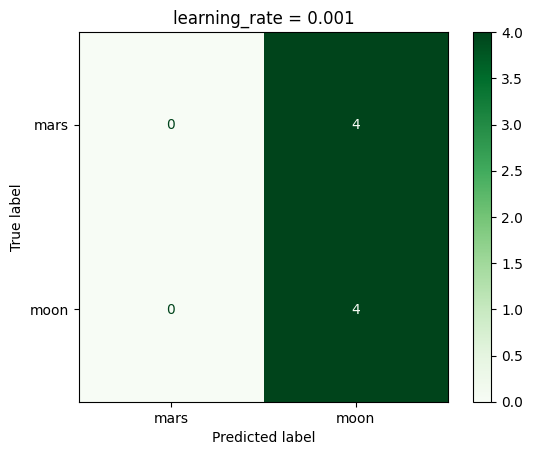

learning_rate = 0.0001 
              precision    recall  f1-score   support

        mars       1.00      0.75      0.86         4
        moon       0.80      1.00      0.89         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8



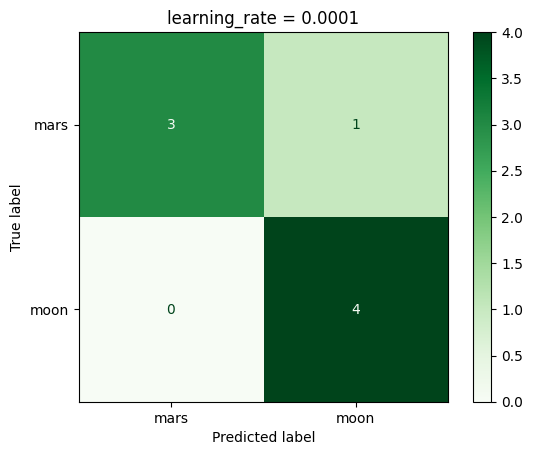

learning_rate = 1e-05 
              precision    recall  f1-score   support

        mars       1.00      1.00      1.00         4
        moon       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



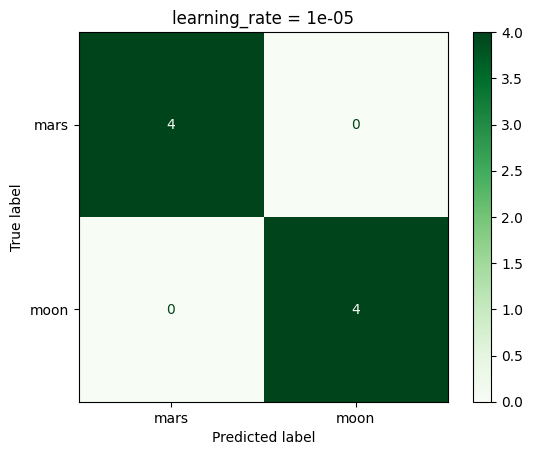

In [ ]:
for i in range(6):
  Classification_score3(10**-i, 10**5)  # Calling the function 'Classification_score3'

#**Conclusion**

**Reflection:**
Comparing images of Mars and the Moon through programming was a challenging yet highly rewarding endeavor. One of the most demanding aspects was acquiring and processing image data, which required proficiency with libraries and image processing techniques. The task involved analyzing large datasets, images, and extracting meaningful features for comparison. Debugging code and handling unforeseen issues, such as varying image resolutions, added complexity to the programming process. However, it was incredibly satisfying to see the program accurately identify and highlight similarities and differences between the two celestial bodies. The project provided an excellent opportunity to apply programming skills in a scientific context and deepen understanding of planetary geology and image analysis techniques.

**Summary:**
In summary, the comparison of images of Mars and the Moon involved exploring various machine learning methods, such as Perceptron, KNN, and SVM. Each method had its strengths and limitations in handling the data. The Perceptron algorithm was suitable for linearly separable data but struggled with complex and non-linear relationships in the images. KNN proved effective in capturing local patterns and classifying similar cases, but faced challenges with handling large datasets and selecting the optimal value for k. In contrast, SVM excelled at separating complex classes through the use of appropriate kernels and finding the best decision boundary. Ultimately, SVM demonstrated excellent performance in classifying and distinguishing features in images of Mars and the Moon, making it the preferred method for this task.